# Постановка задачи

Китайская автомобильная компания Geely Auto стремится выйти на рынок США, создав там свое производственное подразделение и производя автомобили на местном уровне, чтобы конкурировать с американскими и европейскими коллегами.

Они заключили договор с автомобильной консалтинговой компанией, чтобы понять факторы, от которых зависит цена автомобилей. В частности, они хотят понять факторы, влияющие на цены автомобилей на американском рынке, поскольку они могут сильно отличаться от китайского рынка. Компания хочет знать:

- Какие переменные являются значимыми в прогнозировании цены автомобиля
- Насколько хорошо эти переменные описывают цену автомобиля

Основываясь на различных обзорах рынка, консалтинговая фирма собрала большой набор данных о различных типах автомобилей на американском рынке.

# Импорт данных


In [0]:
import pandas as pd
import numpy as np
import os
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns

In [505]:
dataset = pd.read_csv('https://raw.githubusercontent.com/grigorev-max/car-price/master/car%20price%20dataset')
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
205,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
206,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
207,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [506]:
dataset.shape

(209, 26)

In [507]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,102.980861,0.861244,98.732057,174.033493,65.903349,53.728708,2552.287081,126.612440,3.322057,3.251005,10.188612,103.827751,5126.315789,25.253589,30.799043,13244.878789
std,59.490785,1.249954,5.975179,12.307101,2.127801,2.438205,517.432822,41.369094,0.275848,0.321547,4.035515,39.325063,475.860876,6.563140,6.896752,7931.313860
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.000000,183.100000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.000000,16500.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [508]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            209 non-null    int64  
 1   symboling         209 non-null    int64  
 2   CarName           209 non-null    object 
 3   fueltype          209 non-null    object 
 4   aspiration        209 non-null    object 
 5   doornumber        209 non-null    object 
 6   carbody           209 non-null    object 
 7   drivewheel        209 non-null    object 
 8   enginelocation    209 non-null    object 
 9   wheelbase         209 non-null    float64
 10  carlength         209 non-null    float64
 11  carwidth          209 non-null    float64
 12  carheight         209 non-null    float64
 13  curbweight        209 non-null    int64  
 14  enginetype        209 non-null    object 
 15  cylindernumber    209 non-null    object 
 16  enginesize        209 non-null    int64  
 1

# Очистка данных


In [509]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


из столбца car name извлечем название марки автомобиля

In [510]:

CompanyName = dataset['CarName'].apply(lambda x : x.split(' ')[0])
dataset.insert(3,"CompanyName",CompanyName)
#dataset.drop(['CarName'],axis=1,inplace=True)
#dataset.head()
dataset

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,201,-1,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
205,202,-1,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
206,203,-1,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
207,204,-1,volvo 246,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


проверим уникальные значение в каждом, интересующем нас столбце. очевидно, что делать проверку уникальных значений мощности, длины, ширины и т.д. бессмысленно)

In [511]:
dataset['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

видны ошибки в заполнении данных, например 

*   'maxda' и 'mazda' - это одна марка, аналогично
*   'Nissan', 'nissan'
*   'porsche', 'porcshce'
*   'toyota', 'toyouta'
*   'vokswagen', 'volkswagen', 'vw'

исправим неправильные названия на правильные:



In [512]:
def replace_CompanyName(a,b):
    dataset.CompanyName.replace(a,b,inplace=True)

replace_CompanyName('maxda','mazda')
replace_CompanyName('porcshce','porsche')
replace_CompanyName('toyouta','toyota')
replace_CompanyName('vokswagen','volkswagen')
replace_CompanyName('vw','volkswagen')
replace_CompanyName('Nissan','nissan')

print(dataset.CompanyName.unique(), '\n всего марок: ', len(dataset.CompanyName.unique()))

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo'] 
 всего марок:  22


получили 22 уникальные, **правильные** марки

In [513]:
dataset['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [514]:
dataset['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [515]:
dataset['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [516]:
dataset['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [517]:
dataset['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [518]:
dataset['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [519]:
dataset['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [520]:
dataset['wheelbase'].unique() # not intersting

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [521]:
dataset['carlength'].unique() #not intresting

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

In [522]:
dataset['carwidth'].unique() #not intersting

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

In [523]:
dataset['curbweight'].unique() #not intresting

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

In [524]:
dataset['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [525]:
dataset['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [526]:
dataset['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

проверим повторяющиеся значения

In [527]:

dataset.loc[dataset.duplicated()]

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
6,6,2,audi fox,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
80,79,2,mitsubishi outlander,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,2004,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669.0
137,135,3,saab 99le,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0
191,188,2,volkswagen super beetle,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,four,97,idi,3.01,3.40,23.0,68,4500,37,42,9495.0


4 значения дублируются, уберем их

In [0]:
dataset.drop([6, 80, 137, 191], inplace=True)

In [529]:
dataset.shape

(205, 27)

In [530]:
dataset.loc[dataset.duplicated()]

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


дублирующие значения убраны

# Визуализация числовых данных

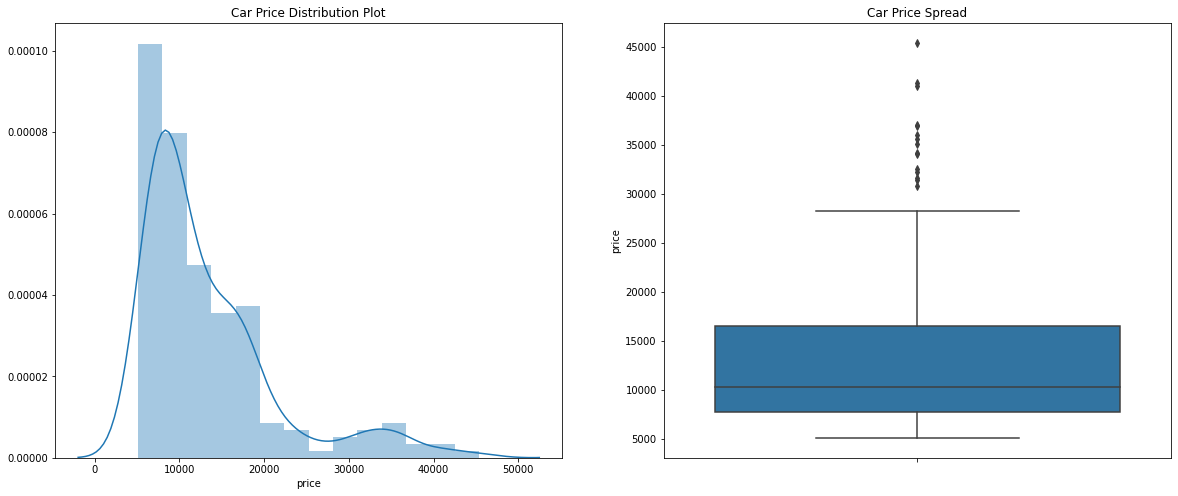

In [531]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(dataset.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=dataset.price)

plt.show()

In [532]:
print(dataset.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


**Вывод:**
* График оказался перекошенным, а это означает, что большинство цен в наборе данных низкие (ниже 15 000).

* Существует значительная разница между средним значением цены и ее медианой.

* Точки данных далеко разбросаны от среднего значения, что указывает на высокую разницу в ценах на автомобили (85% цен ниже 18 500, а остальные 15% находятся между 18 500 и 45 400).

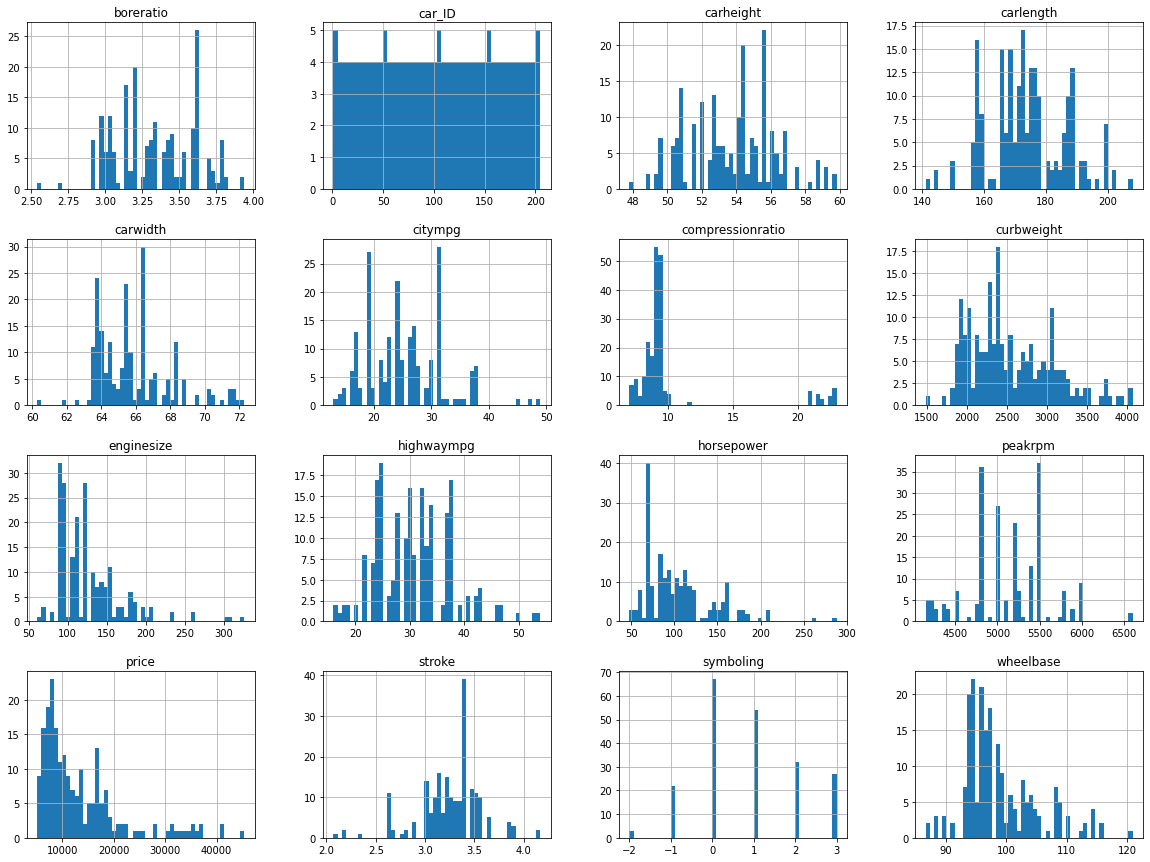

In [533]:
#распределение числовых параметров
%matplotlib inline

dataset.hist(bins=50, figsize=(20,15))

plt.show()

Визуализация зависимости цены от веса, длины, ширины, пробега, и т.д., очевидно реализовывается одинаково, поэтому напишем одну функцию и используем ее .

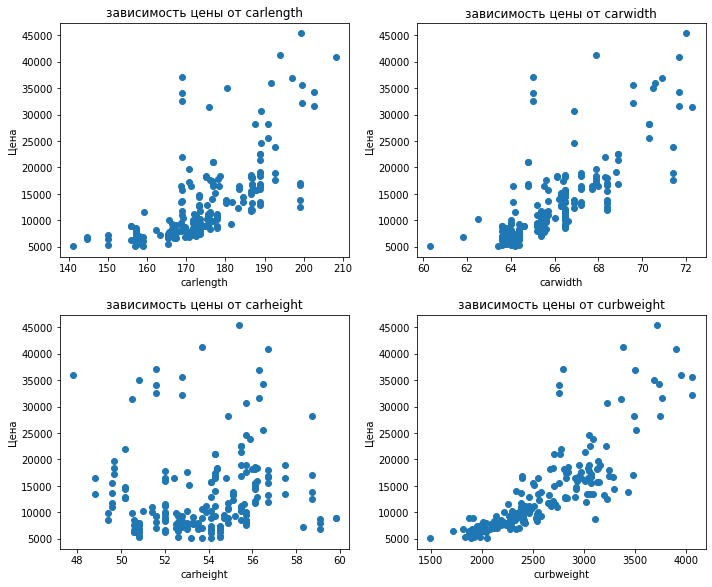

In [534]:
def draw(x,pos):
    plt.subplot(5,2,pos)
    plt.scatter(dataset[x],dataset['price'])
    plt.title('зависимость цены от ' + x)
    plt.ylabel('Цена')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

draw('carlength', 1)
draw('carwidth', 2)
draw('carheight', 3)
draw('curbweight', 4)

plt.tight_layout()

**Вывод:**

* В целом можно наблюдать положительню корреляцию цены с шириной, длинной и весом авто
* Корреляция с высотой не наблюдается

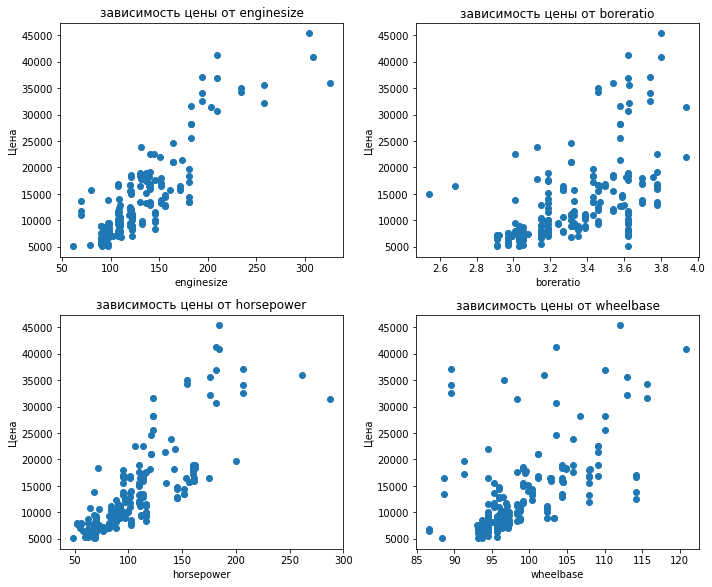

In [535]:

plt.figure(figsize=(10,20))

draw('enginesize', 1)
draw('boreratio', 2)
draw('horsepower', 3)
draw('wheelbase', 4)

plt.tight_layout()



**Вывод:**
наблюдается положительная корреляция с объемом двигателя, мощностью и размером колесной базы



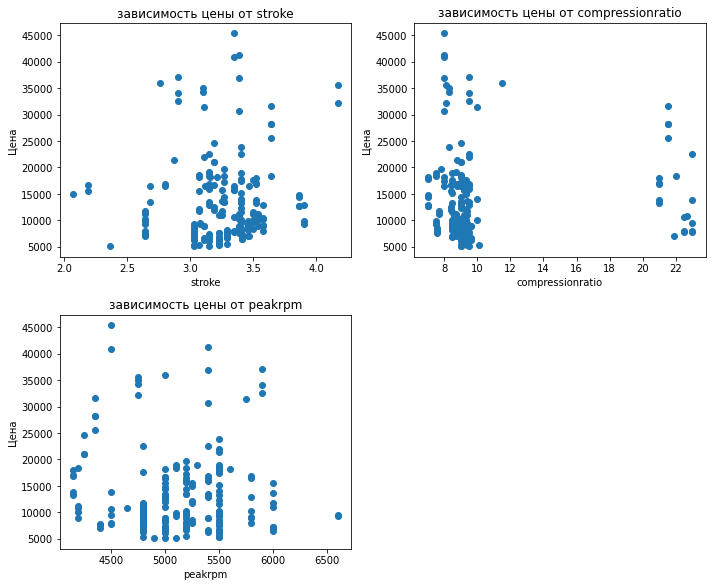

In [536]:

plt.figure(figsize=(10,20))

draw('stroke', 1)
draw('compressionratio', 2)
draw('peakrpm', 3)


plt.tight_layout()

**Вывод:**
нет корреляции с данными величинами


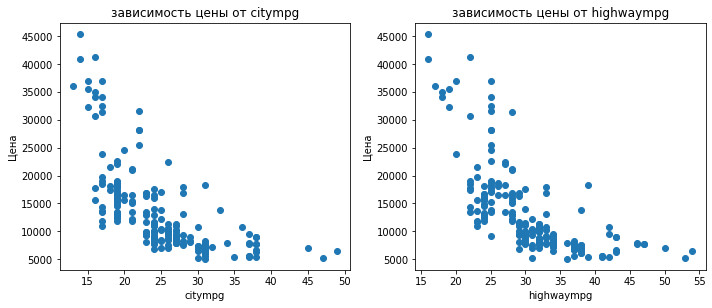

In [538]:
plt.figure(figsize=(10,20))

draw('citympg', 1)
draw('highwaympg', 2)


plt.tight_layout()

**Вывод:**
* Отрицательная корреляция с расходом топлива


# Визуализация категориальных данных

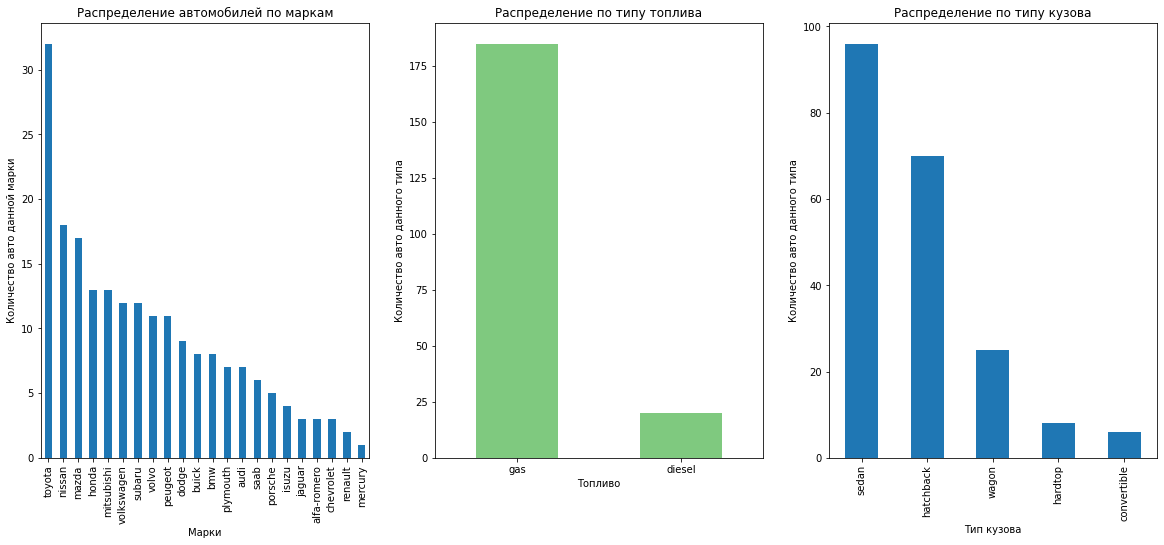

In [450]:

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)

#sns.countplot(dataset.CompanyName, palette=("cubehelix"))
plt1 = dataset.CompanyName.value_counts().plot.bar()
plt.title('Распределение автомобилей по маркам')
plt1.set(xlabel = 'Марки', ylabel='Количество авто данной марки')


plt.subplot(1,3,2)
plt1 = dataset.fueltype.value_counts().plot.bar(rot = 0, cmap = 'Accent')
plt.title('Распределение по типу топлива')
plt1.set(xlabel = 'Топливо', ylabel='Количество авто данного типа')

plt.subplot(1,3,3)
plt1 = dataset.carbody.value_counts().plot.bar()
plt.title('Распределение по типу кузова')
plt1.set(xlabel = 'Тип кузова', ylabel='Количество авто данного типа')



plt.show()

**Вывод:**
* Наиболее популярой компанией оказалась Тойота

* Количество автомобилей, работающих на бинзине сильно больше, чем на дизеле 

* Седан - самый популярный тип автомобилей.

посмотрим на параметр страхового риска (от -2 до +3)

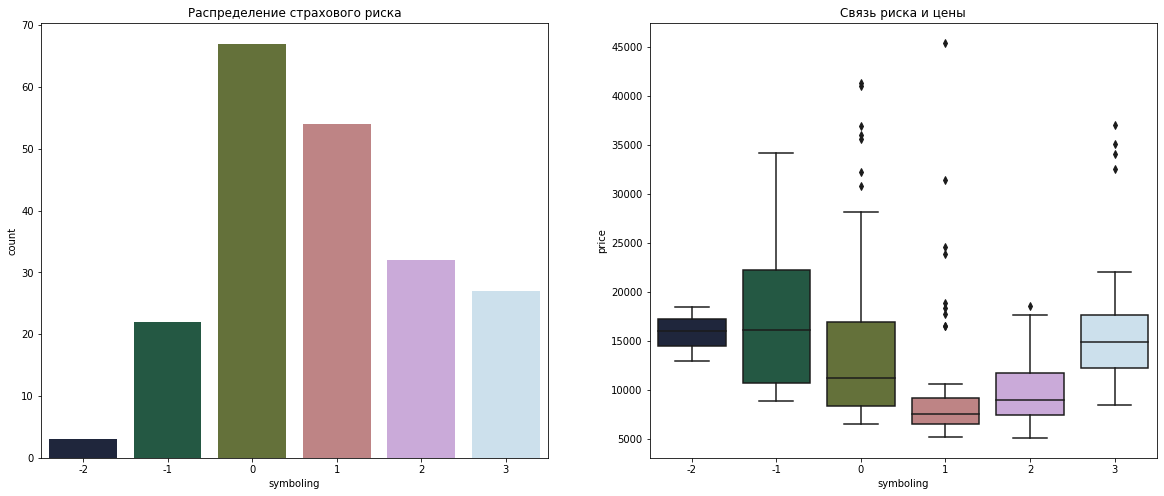

In [451]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Распределение страхового риска')
sns.countplot(dataset.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Связь риска и цены')
sns.boxplot(x=dataset.symboling, y=dataset.price, palette=("cubehelix"))

plt.show()

**Вывод:**
* Видно, что наиболее продаваемые автомобили с рейтингом 0 и 1

* Из боксплота можно сделать вывод, что автомобили с рейтингом -1 стоят дорого (дорогие авто реже попадают в аварии)

* автомобили с рейтингом 3 и -1 находятся в одной ценовой категории.

* Авто с рейтингом 1 - самые дешевые. (и при этом одни из самых продавваемых)

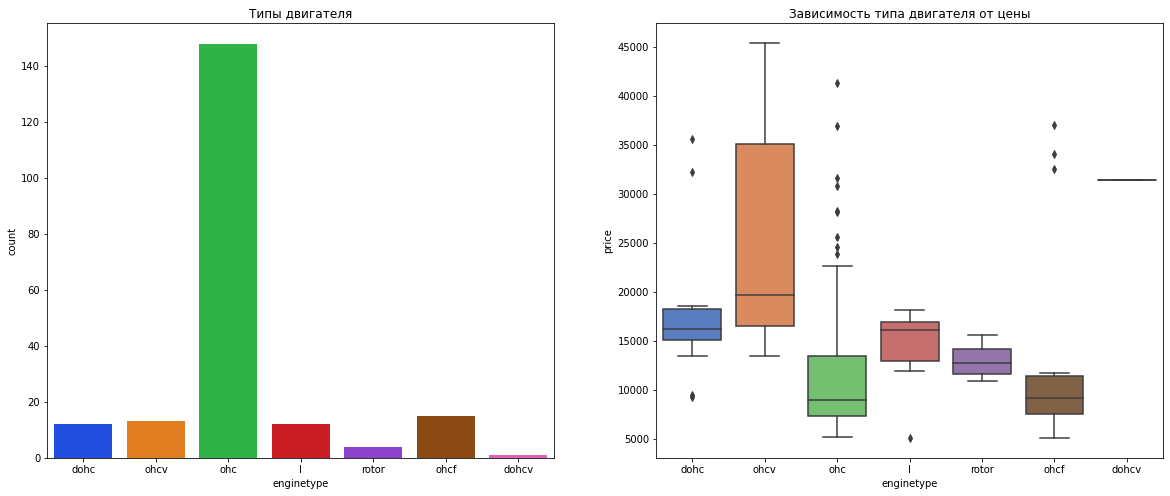

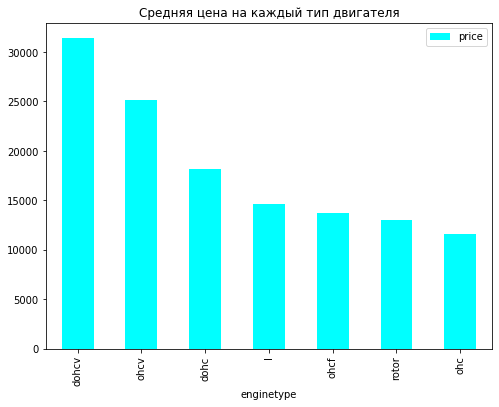

In [452]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Типы двигателя')
sns.countplot(dataset.enginetype, palette=("bright"))

plt.subplot(1,2,2)
plt.title('Зависимость типа двигателя от цены')
sns.boxplot(x=dataset.enginetype, y=dataset.price, palette=("muted"))

plt.show()

df = pd.DataFrame(dataset.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6), cmap = 'cool')
plt.title('Средняя цена на каждый тип двигателя')
plt.show()

**Вывод: **
* ohc - наиболее предпочтительный тип. (с минимальной средней ценой и значительным ценовым диапозоном). твердо занимает низ рынка

* Роторные и dohcv двигатели почти не пользуются спросом, при этом * dohcv - почти не имеет разброса в цене (всегда дорогие), а роторные - обычно дешевые

* ohcv - имеет самый широкий ценовой диапазон(от 14к до 45к) пользуется неплохим спросом среди дорогих авто





поищем следующие зависимости средней цены:

<Figure size 1800x432 with 0 Axes>

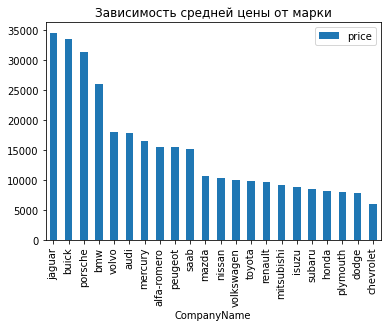

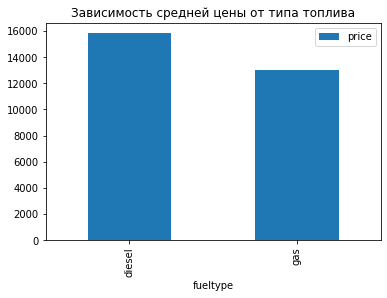

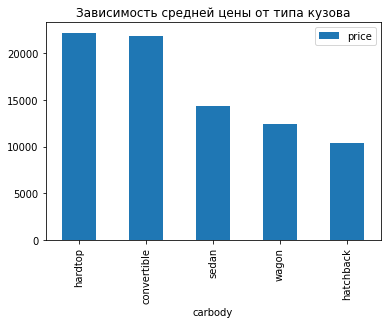

In [453]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(dataset.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Зависимость средней цены от марки')
plt.show()

df = pd.DataFrame(dataset.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Зависимость средней цены от типа топлива')
plt.show()

df = pd.DataFrame(dataset.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Зависимость средней цены от типа кузова')
plt.show()

**Вывод:**

* Cамые дорогие марки: Ягуар, Бьюик, Порше и BMW

* В дешевом сегменте твердо укрепились американские и азиатские авто

* Середину рынка делят между собой европейские и японские компании

* Дизельные авто, в среднем, немного дороже бензиновых, но это различие едва можно назвать существенным

* Самыми дорогими являются хардтопы и кабриолета

* Самыми дешевыми - хэчбеки

* Фургоны и седаны занимают средний ценовой сегмент




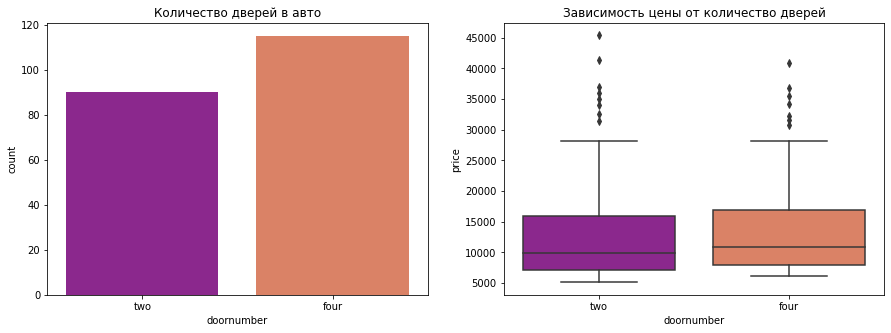

In [454]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Количество дверей в авто')
sns.countplot(dataset.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Зависимость цены от количество дверей')
sns.boxplot(x=dataset.doornumber, y=dataset.price, palette=("plasma"))

plt.show()




**Вывод:**
* Четырехдверные авто пользуются бОльшим спросом, чем двухдверные, однако, цена отличается не сильно
* Можно считать эту переменную незначимой

Параметр aspiration - показывает оснащен ли автомобиль турбонаддувом или имеет атмосферный двигатель

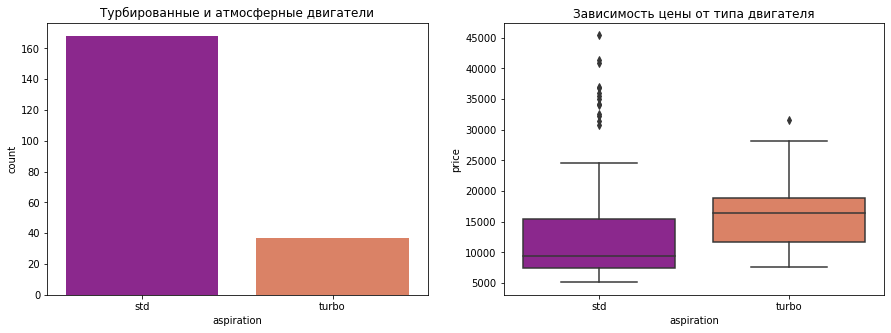

In [455]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Турбированные и атмосферные двигатели')
sns.countplot(dataset.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Зависимость цены от типа двигателя')
sns.boxplot(x=dataset.aspiration, y=dataset.price, palette=("plasma"))

plt.show()

**Вывод:**

* Атмосферные двигатели намного популярнее турбированных

* Кажется, что "турбовые" двигатели дороже, но "атмосферники" имеют много значений за пределами усов 

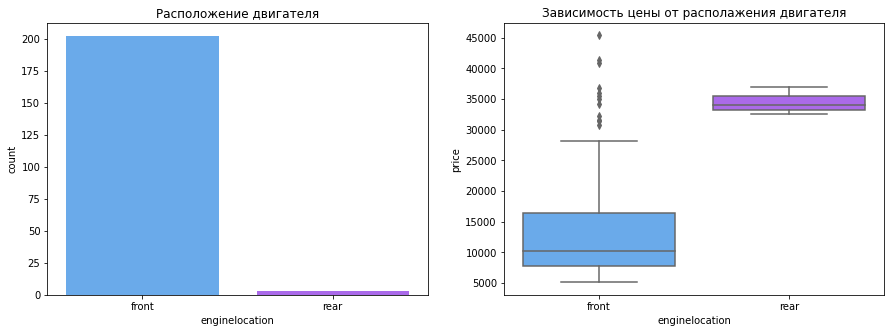

In [456]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Расположение двигателя')
sns.countplot(dataset.enginelocation, palette=("cool"))

plt.subplot(1,2,2)
plt.title('Зависимость цены от располажения двигателя')
sns.boxplot(x=dataset.enginelocation, y=dataset.price, palette=("cool"))

plt.show()

**Вывод:**
* Заднемоторных авто очень мало, но, при этом, они сильно дороже переднемоторных(за исключением выбросов)

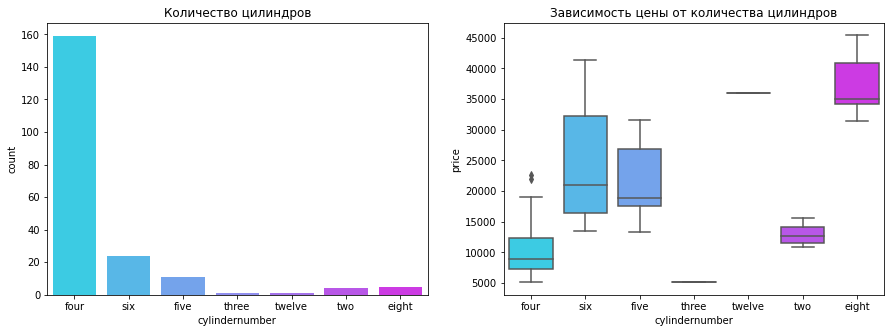

In [457]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Количество цилиндров')
sns.countplot(dataset.cylindernumber, palette=("cool"))

plt.subplot(1,2,2)
plt.title('Зависимость цены от количества цилиндров')
sns.boxplot(x=dataset.cylindernumber, y=dataset.price, palette=("cool"))

plt.show()

**Вывод:**
* Самые популярные и, при этом, дешевые авто, с большим ассортиментом имеют четыре цилиндра
* 3-ех цилиндровые авто - самые дешевые, но почти не пользуются спросом
* Средний сегмент плотно заняли 5-ти и 6-ти цилиндровые двигатели
* Восьми и 12-ти цилиндровые авто можно отнести к премиум сегменту (их немного и они дорогие)

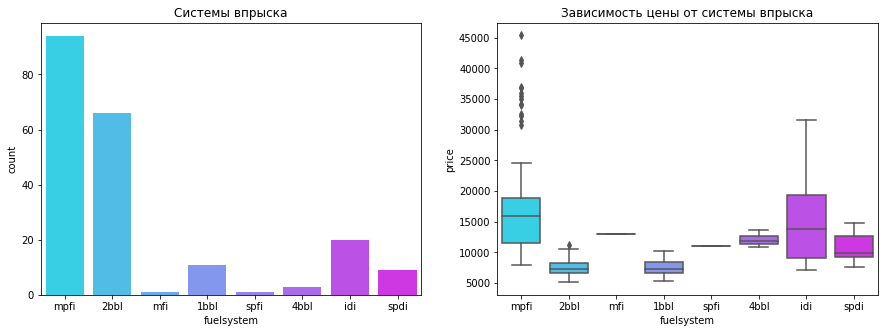

In [458]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Системы впрыска')
sns.countplot(dataset.fuelsystem, palette=("cool"))

plt.subplot(1,2,2)
plt.title('Зависимость цены от системы впрыска')
sns.boxplot(x=dataset.fuelsystem, y=dataset.price, palette=("cool"))

plt.show()

**Вывод:**
* mpfi - самая расспространенная система с с большим диапозоном цен в среднем сегменте и множественными выбросами в премиум сегменте
* mpfi и idi - имеют наибольший ценовой диапазон
* 2bbl и 1bbl-  очень распространенны среди дешевых машин
* spfi и mfi - не пользуются популярностью и являются представителями среднего и эконом сегмента
* idi - встречается довольно часто в среднем и премиум сегментах 


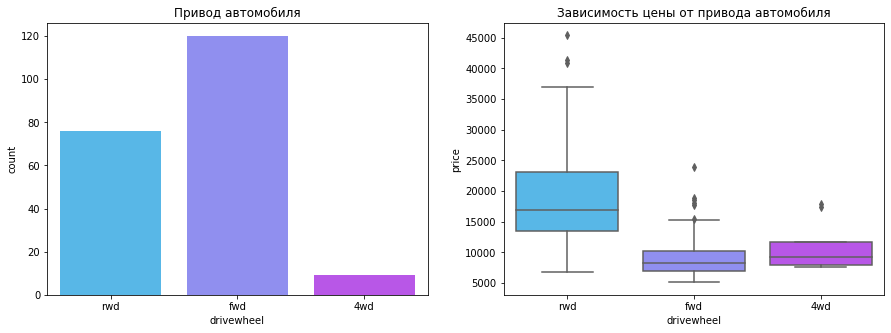

In [459]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Привод автомобиля')
sns.countplot(dataset.drivewheel, palette=("cool"))

plt.subplot(1,2,2)
plt.title('Зависимость цены от привода автомобиля')
sns.boxplot(x=dataset.drivewheel, y=dataset.price, palette=("cool"))

plt.show()




**Вывод:**
* Наиболее распространенны переднеприводные авто
* Переднеприводные авто плотно занимают низ рынка
* Заднеприводные авто имеют неплохой спрос и огромнейший диапазон цен (от эконом до премиум сегмента)
* Полноприводные авто почти не пользуются популярностью и находятся в низу рынка


# добавление новых переменных

очевидно, что cредний расход топлива автомобиля легко заменит два параматера:расход в городе и расход по трассе

In [0]:
dataset['mpg'] = (dataset['citympg'] + dataset['highwaympg'])/2

In [0]:
dataset.drop('citympg', axis = 1, inplace = True)
dataset.drop('highwaympg', axis = 1, inplace = True)

# создание разных обучающих выборок

In [462]:
dataset.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,-0.109093,0.013636
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.079978,0.000297
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.577816,-0.511871
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.682920,-0.693200
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.759325,-0.665184
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,0.119336,-0.079321
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.835305,-0.783584
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.874145,-0.670689
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.553173,-0.590044
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,0.079443,-0.043372


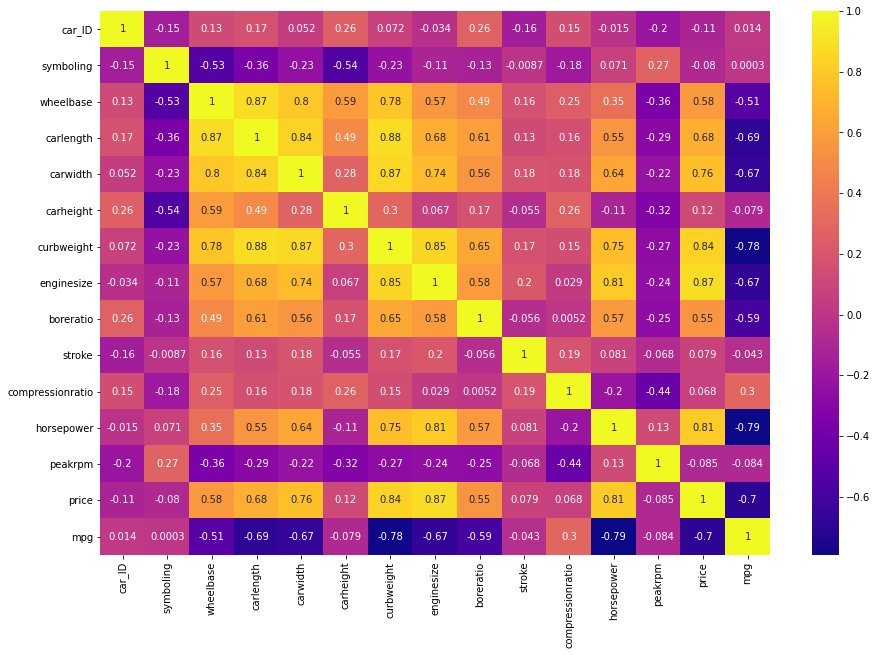

In [463]:
plt.figure(figsize = (15, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="plasma")
plt.show()

т.к. мы  изначально точно не знаем, какие параметры наиболее важны для нашей модели (хотя после описательного анализа уже +/- ясно что больше влияетна цену), предлагаю сделать разные наборы обучающих выборок

cледующие параметры представляют наибольший интерес
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- mpg

но, как мы уже убедились на стадии визуализации, некоторые из них весьма сильно коррелируют между собой, и, возможно, мы сможем уменьшить кол-во параметров

In [464]:
np.corrcoef(dataset['carlength'], dataset['carwidth'])

array([[1.        , 0.84111827],
       [0.84111827, 1.        ]])

явный пример корреляции параметров

In [0]:
train1 = dataset[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'mpg', 'carlength','carwidth']]

In [0]:
train2 = dataset[['price', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'mpg', 'carwidth']]

In [0]:
train3 = dataset[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'enginesize', 'boreratio','horsepower', 
                    'mpg', 'carlength','carwidth']]

In [0]:
train4 = dataset[['price', 'carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'mpg', 'carwidth']]

# преобразование качественных признаков


преобразуем все значимые качественные признаки в бинарные используя метод get_dummies библиотеки pandas. т.к. качественных признаков у нас много, напишем для этого функцию

In [0]:
def dummi(df, feature):
    vector = pd.get_dummies(df[feature])      #преобразуем признак, имеющий n уникальных значений в бинарный вектор размера n
    df = pd.concat([df, vector], axis = 1)    #добавляем вектор к датафрейму
    df.drop([feature], axis = 1, inplace = True)  #удаляем качественный признак из дф
    return df

In [470]:
dataset.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0


In [0]:
#dataset = dummi (dataset, 'fueltype')
#dataset = dummi(dataset, 'aspiration')
#dataset = dummi(dataset, 'carbody')
#dataset = dummi(dataset, 'drivewheel')
#dataset = dummi(dataset, 'enginetype')
#dataset = dummi(dataset, 'cylindernumber')
#dataset = dummi(dataset, 'enginelocation')
#dataset = dummi(dataset, 'fuelsystem')
#dataset = dummi(dataset, 'doornumber')


In [0]:
train1= dummi(train1, 'fueltype')
train1= dummi(train1, 'aspiration')
train1= dummi(train1, 'carbody')
train1= dummi(train1, 'drivewheel')
train1= dummi(train1, 'enginetype')
train1= dummi(train1, 'cylindernumber')

In [0]:
train2= dummi(train2, 'aspiration')
train2= dummi(train2, 'carbody')
train2= dummi(train2, 'drivewheel')
train2= dummi(train2, 'enginetype')
train2= dummi(train2, 'cylindernumber')


In [0]:
train3= dummi(train3, 'fueltype')
train3= dummi(train3, 'aspiration')
train3= dummi(train3, 'carbody')
train3= dummi(train3, 'drivewheel')
train3= dummi(train3, 'enginetype')

In [0]:
train4= dummi(train4, 'carbody')
train4= dummi(train4, 'drivewheel')
train4= dummi(train4, 'enginetype')
train4= dummi(train4, 'cylindernumber')

In [0]:
training_ds = [train1, train2, train3, train4]

# выбор метрик


Т.к. мы решаем задачу регрессии - основными метриками для нее являются коэффициент детерминации, среднеквадратическая ошибка и средняя абсолютная ошибка. т.к. последние две обладают накопитльным эффектом, основной метрикой, на которую я буду ориентироваться - является r^2

# *построение моделей*

обозначим все используемые модели

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

SVM = svm.SVR()
Linear = LinearRegression()
Tree = tree.DecisionTreeRegressor()
RF = RandomForestRegressor()
GB = GradientBoostingRegressor()
models = [SVM, Linear, Tree, RF, GB]

напишем функцию, которая будет строить модель и считать все необхожимые метрики


In [0]:
# импортируем метрики
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def train(model, dataset):
  t0 = time.time()                      
  X = dataset.iloc[:, 1:].values
  y = dataset.iloc[:, 0].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
  model.fit(X_train, y_train)
  model.score(X_test, y_test)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error (y_test, y_pred)
  print("Модель:", str(model)[:str(model).find('(')])
  print("Время обучения модели:", time.time() - t0, 'сeк.')
  print('Точность модели:', r2)
  print('MSE =', mse)
  print('MAE =', mae)
  print('\n')

In [479]:
train(Linear, train1)

Модель: LinearRegression
Время обучения модели: 0.007155179977416992 сeк.
Точность модели: 0.6867680374215774
MSE = 9931699.077883113
MAE = 1958.8356220142387




построим все модели разом, с помощью цикла

In [480]:

for i in range (len(training_ds)):
  print ("Выборка ", i+1)
  for model in models:
    train(model, training_ds[i])

Выборка  1
Модель: SVR
Время обучения модели: 0.013123750686645508 сeк.
Точность модели: 0.0005154084155811756
MSE = 31690827.828951452
MAE = 4363.376425106475


Модель: LinearRegression
Время обучения модели: 0.004540920257568359 сeк.
Точность модели: 0.6867680374215774
MSE = 9931699.077883113
MAE = 1958.8356220142387


Модель: DecisionTreeRegressor
Время обучения модели: 0.004885673522949219 сeк.
Точность модели: 0.7071696397442653
MSE = 9284822.005353048
MAE = 1788.5914032258065


Модель: RandomForestRegressor
Время обучения модели: 0.19934582710266113 сeк.
Точность модели: 0.8483295787038116
MSE = 4809039.827640067
MAE = 1367.804596075269


Модель: GradientBoostingRegressor
Время обучения модели: 0.05760455131530762 сeк.
Точность модели: 0.8234695275184921
MSE = 5597281.69606545
MAE = 1482.4096426707767


Выборка  2
Модель: SVR
Время обучения модели: 0.008130550384521484 сeк.
Точность модели: 0.0005215599651151592
MSE = 31690632.78072479
MAE = 4363.357688603248


Модель: LinearRegr

мы имеем данные по всем моделям, но на них неудобно смотреть одновременно на все, а значит - неудобно сравнивать. Попробуем запихнуть все в одну таблицу

# построение сводной таблицы

заведем пустой датафрейм

In [481]:
df1 =  pd.DataFrame(index=['pbp'], columns=['Выборка', 'Модель'], dtype=str)
df2 =  pd.DataFrame(index=['pbp'], columns=['time', 'r2','MSE', 'MAE'], dtype=float)
df = pd.concat([df1, df2], axis=1)
df

,Выборка,Модель,time,r2,MSE,MAE
pbp,NaN,NaN,NaN,NaN,NaN,NaN


нам понадобится функция, которая возвраает имя переменной (чтобы добавлять имя выборки в ДФ)

In [0]:
def get_name(x, g=globals()):
    return ([n for n in g if id(g[n]) == id(x)])

перепишем функцию построения модели так, чтобы она записывала результаты сразу в ДФ

In [0]:
def train_pd(model, dataset, df):
  t0 = time.time()
  X = dataset.iloc[:, 1:].values
  y = dataset.iloc[:, 0].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
  model.fit(X_train, y_train)
  model.score(X_test, y_test)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error (y_test, y_pred)
  df.loc[df.shape[0]] = [get_name(dataset), str(model)[:str(model).find('(')],  time.time() - t0, r2, mse, mae]

обучим все модели на всех выборках

In [0]:
for i in range (len(training_ds)):
  for model in models:
    train_pd(model, training_ds[i], df)

In [485]:
df

,Выборка,Модель,time,r2,MSE,MAE
pbp,NaN,NaN,NaN,NaN,NaN,NaN
1,[train1],SVR,0.013084,0.000515,3.169083e+07,4363.376425
2,[train1],LinearRegression,0.003654,0.686768,9.931699e+06,1958.835622
3,[train1],DecisionTreeRegressor,0.004419,0.666115,1.058656e+07,1943.317210
4,[train1],RandomForestRegressor,0.190399,0.835114,5.228080e+06,1422.479543
5,[train1],GradientBoostingRegressor,0.060998,0.816712,5.811547e+06,1488.873014
6,[train2],SVR,0.007264,0.000522,3.169063e+07,4363.357689
7,[train2],LinearRegression,0.003585,0.713928,9.070518e+06,1918.126383
8,[train2],DecisionTreeRegressor,0.004236,0.695472,9.655711e+06,1952.034952
9,[train2],RandomForestRegressor,0.179061,0.813430,5.915595e+06,1502.535064


In [486]:
df['r2'].max()

0.8404493408600027

т.к. от запуска к запуску точность RF и GB изменяется, а точность опорных векторов очень мала, то ориентируясь на значения точности линейной регрессии и дерева решений (которые постоянны), можно сделать вывод, что признаки, используемые в 4ой выборке дают наиболее точный результат.

время обучения во всех случаях ничтожно мало, не будем его учитывать


на всех выборках наилучший скор дает модель случайного леса

# выборка 1

In [487]:
train1.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,mpg,carlength,carwidth,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,24.0,168.8,64.1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,24.0,168.8,64.1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.5,171.2,65.5,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,27.0,176.6,66.2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,20.0,176.6,66.4,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [0]:
X1 = train1.iloc[:, 1:].values
y1 = train1.iloc[:, 0].values


In [489]:
print(X1[0], y1[0])

[8.860e+01 2.548e+03 1.300e+02 3.470e+00 1.110e+02 2.400e+01 1.688e+02
 6.410e+01 0.000e+00 1.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00] 13495.0


In [490]:
for model in models:
  train(model, train1)

Модель: SVR
Время обучения модели: 0.013057708740234375 сeк.
Точность модели: 0.0005154084155811756
MSE = 31690827.828951452
MAE = 4363.376425106475


Модель: LinearRegression
Время обучения модели: 0.007807016372680664 сeк.
Точность модели: 0.6867680374215774
MSE = 9931699.077883113
MAE = 1958.8356220142387


Модель: DecisionTreeRegressor
Время обучения модели: 0.006098747253417969 сeк.
Точность модели: 0.6642312103429193
MSE = 10646278.084677419
MAE = 1918.0403225806451


Модель: RandomForestRegressor
Время обучения модели: 0.1855311393737793 сeк.
Точность модели: 0.8333256325220846
MSE = 5284772.499462656
MAE = 1433.8107795161288


Модель: GradientBoostingRegressor
Время обучения модели: 0.06154775619506836 сeк.
Точность модели: 0.8110393413813327
MSE = 5991407.720689877
MAE = 1508.5878888440864




# Выборка 2



In [491]:
train2.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,mpg,carwidth,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,24.0,64.1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,24.0,64.1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.5,65.5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,27.0,66.2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,20.0,66.4,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [492]:
for model in models:
  train(model, train2)

Модель: SVR
Время обучения модели: 0.011940956115722656 сeк.
Точность модели: 0.0005215599651151592
MSE = 31690632.78072479
MAE = 4363.357688603248


Модель: LinearRegression
Время обучения модели: 0.004737377166748047 сeк.
Точность модели: 0.7139284844123742
MSE = 9070518.168652456
MAE = 1918.126383254995


Модель: DecisionTreeRegressor
Время обучения модели: 0.005574703216552734 сeк.
Точность модели: 0.7635780609984968
MSE = 7496270.604838709
MAE = 1761.4516129032259


Модель: RandomForestRegressor
Время обучения модели: 0.1917407512664795 сeк.
Точность модели: 0.8332870571209966
MSE = 5285995.616261661
MAE = 1421.9157132795694


Модель: GradientBoostingRegressor
Время обучения модели: 0.053992271423339844 сeк.
Точность модели: 0.7718440433034531
MSE = 7234179.698916619
MAE = 1584.0137731810034




# Выборка 3


In [493]:
train3.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,mpg,carlength,carwidth,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,13495.0,88.6,2548,130,3.47,111,24.0,168.8,64.1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,24.0,168.8,64.1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.5,171.2,65.5,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,13950.0,99.8,2337,109,3.19,102,27.0,176.6,66.2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,17450.0,99.4,2824,136,3.19,115,20.0,176.6,66.4,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [494]:
for model in models:
  train(model, train3)

Модель: SVR
Время обучения модели: 0.013686180114746094 сeк.
Точность модели: 0.0005371426808501445
MSE = 31690138.69690837
MAE = 4363.309501270912


Модель: LinearRegression
Время обучения модели: 0.006070852279663086 сeк.
Точность модели: 0.6955151365173438
MSE = 9654353.320098817
MAE = 2080.324176099736


Модель: DecisionTreeRegressor
Время обучения модели: 0.006777286529541016 сeк.
Точность модели: 0.6327115775359918
MSE = 11645676.439516129
MAE = 2078.6532258064517


Модель: RandomForestRegressor
Время обучения модели: 0.19633841514587402 сeк.
Точность модели: 0.8579122648859658
MSE = 4505199.968081942
MAE = 1348.7977553225805


Модель: GradientBoostingRegressor
Время обучения модели: 0.06349658966064453 сeк.
Точность модели: 0.8046114827550545
MSE = 6195216.926704056
MAE = 1519.1264276690758




# Выборка 4


In [495]:
train4.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,mpg,carwidth,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,24.0,64.1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,24.0,64.1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.5,65.5,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,27.0,66.2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,20.0,66.4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [496]:
for model in models:
  train(model, train4)

Модель: SVR
Время обучения модели: 0.012094259262084961 сeк.
Точность модели: 0.0005271780174940233
MSE = 31690454.648183107
MAE = 4363.340390368955


Модель: LinearRegression
Время обучения модели: 0.004773378372192383 сeк.
Точность модели: 0.730208684118646
MSE = 8554319.109400796
MAE = 1849.5913767209024


Модель: DecisionTreeRegressor
Время обучения модели: 0.0051097869873046875 сeк.
Точность модели: 0.7139217119828718
MSE = 9070732.903225806
MAE = 1956.3709677419354


Модель: RandomForestRegressor
Время обучения модели: 0.17774701118469238 сeк.
Точность модели: 0.8341872739095226
MSE = 5257452.289536947
MAE = 1422.4858777112136


Модель: GradientBoostingRegressor
Время обучения модели: 0.05557870864868164 сeк.
Точность модели: 0.7767650688079688
MSE = 7078147.906812386
MAE = 1542.024667788182




# Grid Search

беря во внимание все выше сказанное, проведем Grid Search на модели rf на 4ой подвыборке

In [497]:
#cтандартная модель RF от sclearn
X1 = train1.iloc[:, 1:].values
y1 = train1.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=40)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
RF.score(X_test, y_test)

0.8446318968174278

посмотрим на все параметры нашей модели

In [498]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

зададим список возможных значения для некоторых параметров

In [0]:
parameters = {'ccp_alpha': [0.0, 0.05, 0.02],
              'criterion': ['mse', "mae", 'r2'],               
              'n_estimators': [x for x in range(100, 200, 10)],
              
 }

In [500]:
RFclf = GridSearchCV(RF, parameters, n_jobs=-1)
RFclf.fit(X_train, y_train)
print(RFclf.score(X_test, y_test))

0.8456795065692881


In [501]:
RFclf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.02, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [502]:
RFclf.best_score_

0.908033949001506

In [503]:
RFclf.best_params_

{'ccp_alpha': 0.02, 'criterion': 'mse', 'n_estimators': 100}

**вывод:**
* лучший результат 90% достигается при параметрах:
альфа = 0.02 и числе деревьев = 140